# Capítulo 1
Introdução ao PyTorch e ao dataset CIFAR-10. De prefencia algumas plotagens das imagens desse dataset.

# Treinando um classificador de imagem
1. Carregue e normalize os conjuntos de dados de treinamento e teste CIFAR10 usando *torchvision*
2. Definir uma rede neural convulacional
3. Definir uma loss function
4. Treinar a rede com os dados de treinamento
5. Teste a rede com os dados de teste

In [10]:
# Carregando as bibliotecas que serão usadas

import torch # Usado para construir e treinar redes neurais.
import torch.nn as nn
import torch.optim as optim
import torchvision # Possui utilitários para processamento de dados, como datasets e modelos pré-treinados.
import torchvision.transforms as transforms
import matplotlib.pyplot as plt # Para plotar gráficos e visualizar resultados.
import numpy as np

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(), # converte as imagens em tensores
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normaliza os dados
])

# carregando os dados de treino
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# carregando os dados de teste
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


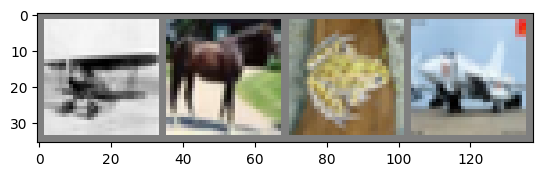

plane horse frog  plane


In [12]:
def mostrar_imagens(img):
  img = img / 2 + 0.5 # Desnormalizar (reverter a normalização)
  npimg = img.numpy() # converter tensor para numpy
  plt.imshow(np.transpose(npimg, (1, 2, 0))) # transpor para formato HWC
  plt.show()


# obtendo imagens de treinamento aleatórias
dataiter = iter(trainloader) # iterador para o DataLoader
images, labels = next(dataiter) # obter um batch de imagens e rótulos

# Definir as classes do CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# mostrar imagens
mostrar_imagens(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [13]:
model = torchvision.models.resnet18(pretrained=False) # 'False' indica que estamos treinando a rede do ZERO !!!!!!!!!
model.fc = nn.Linear(model.fc.in_features, 10) # Modifica a última camada para 10 classes (CIFAR-10)

Explicação:
* ResNet18: Uma rede neural profunda com blocos de camadas residuais que ajudam a lidar com problemas de degradação em redes muito profundas.
* model.fc: Ajustamos a última camada (fully connected) para que a rede produza 10 saídas, correspondentes às 10 classes do CIFAR-10.

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Explicação:
* CrossEntropyLoss: Calcula a diferença entre as predições do modelo e as classes reais. Essa função é ideal para problemas de classificação multiclasses.
* Adam Optimizer: Atualiza os pesos da rede de forma eficiente, adaptando-se às mudanças na função de perda.

In [15]:
epochs = 5 # número de épocas (quantas vezes o modelo verá o conjunto de treino)

train_losses = []
for epoch in range(epochs):
  model.train() # coloca o modelo em modo de treinamento
  running_loss = 0.0

  for inputs, labels in trainloader:

    optimizer.zero_grad() # zera os gradientes acumulados
    outputs = model(inputs) # foward pass: obtem as predições
    loss = criterion(outputs, labels) # calcula a perda
    loss.backward() # backward pass: calcula os gradientes
    optimizer.step() # atualiza os pesos

    running_loss += loss.item() # acumula a perda

  epoch_loss = running_loss / len(trainloader)
  train_losses.append(epoch_loss)
  print(f'Epoch [{epoch + 1} / {epochs}], Loss: {epoch_loss:.4f}')

Epoch [1 / 5], Loss: 2.0257


KeyboardInterrupt: 

Explicação:
* num_epochs: Número de épocas define quantas vezes o modelo verá todo o dataset de treinamento.
* model.train(): Coloca o modelo no modo de treinamento, permitindo que os gradientes sejam calculados e os pesos atualizados.
* optimizer.zero_grad(): Zera os gradientes antes de cada iteração, para que eles não sejam acumulados.
* outputs = model(inputs): Passa as imagens através da rede para gerar predições.
* loss.backward(): Calcula os gradientes da função de perda em relação aos pesos.
* optimizer.step(): Atualiza os pesos da rede com base nos gradientes calculados.

In [16]:
model.eval() # coloca o modelo em modo de avaliação (desativa o cálculo de gradientes)
correct = 0
total = 0

with torch.no_grad(): # desativa o cálculo de gradientes durante a avaliação
  for inputs, labels in testloader:
    output = model(inputs)
    _, predicted = torch.max(outputs.data, 1) # obtem a classe prevista com a maior probabilidade
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Acurácia no conjunto de teste: {accuracy:.2f}%')


RuntimeError: The size of tensor a (4) must match the size of tensor b (128) at non-singleton dimension 0

Explicação:
* model.eval(): Coloca o modelo em modo de avaliação, onde ele não precisa calcular gradientes.
* torch.no_grad(): Desativa o autograd (backpropagation) para economizar memória durante a avaliação.
* correct e total: Contam quantas previsões a rede acertou e qual o total de amostras avaliadas, respectivamente.

In [ ]:
plt.plot(train_losses, label='Perda de treinamento')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()